<a href="https://colab.research.google.com/github/AsthmaticDonkey/Thesis/blob/master/ORB3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install image-match

In [0]:
pip install pydicom

In [0]:
from google.colab import drive
drive.mount('/content/drive')
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from image_match.goldberg import ImageSignature
import image_match
import cv2
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt, cm
from __future__ import division
import pydicom as DCM
import time

Mounted at /content/drive


In [0]:
path = Path('/content/drive/My Drive/ThesisData')

dest = path
dest.mkdir(parents=True, exist_ok=True)

dicom_image_file_0 = DCM.read_file('/content/drive/My Drive/ThesisData/Body1.dcm')

/usr/local/lib/python3.6/dist-packages/pydicom/filereader.py:313: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)


In [0]:
img = dicom_image_file_0.pixel_array[500]
plt.imsave('/content/drive/My Drive/ThesisData/Test.png',img)

In [0]:
inti = 0
mlist = [] 
direction = 0

gis = ImageSignature()
a = gis.generate_signature(img)
directory = '/content/drive/My Drive/ThesisData/'

for inum in range(0, dicom_image_file_0.pixel_array.shape[0]):
  b = gis.generate_signature(dicom_image_file_0.pixel_array[inum])
  mlist.append([gis.normalized_distance(a, b),inum,direction])
  if(gis.normalized_distance(a, b) == 0):
    print('found')
    break;



found


In [0]:
tformIm = []
tformArr = []

length1 = dicom_image_file_0.pixel_array.shape[0]
length2 = dicom_image_file_0.pixel_array.shape[1]
length3 = dicom_image_file_0.pixel_array.shape[2]



for inti2 in range(0,length2):
  for inti1 in range(0,length1):
    tformIm.append(dicom_image_file_0.pixel_array[inti1][inti2])
  tformArr.append(tformIm)
  tformIm = []


In [0]:
inti = 0
direction = 1
for img1 in tformIm:
  b = gis.generate_signature(tformIm[inti])
  mlist.append([gis.normalized_distance(a, b),inti,direction])
  if(gis.normalized_distance(a, b) == 0):
    print('found')
  inti = inti+1


numMatch = 100
ind = 1
direc = 5

for i in mlist:
  if(i[0] < numMatch):
    numMatch = i[0]
    ind = i[1]
    direc = i[2]

500
0.0
0


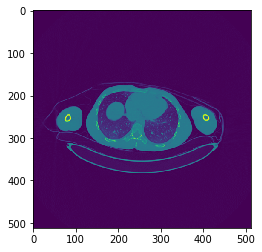

In [0]:
print(ind)
print(numMatch)
if(numMatch>0.5):
  direc = 5;
print(direc)



if(direc == 0):
  imgplot = plt.imshow(dicom_image_file_0.pixel_array[ind])
elif(direc == 1):
  imgplot = plt.imshow(tformArr[ind])
elif(direc == 5):
  print("No Match Found")

#ORB

500


500
17.757636547088623


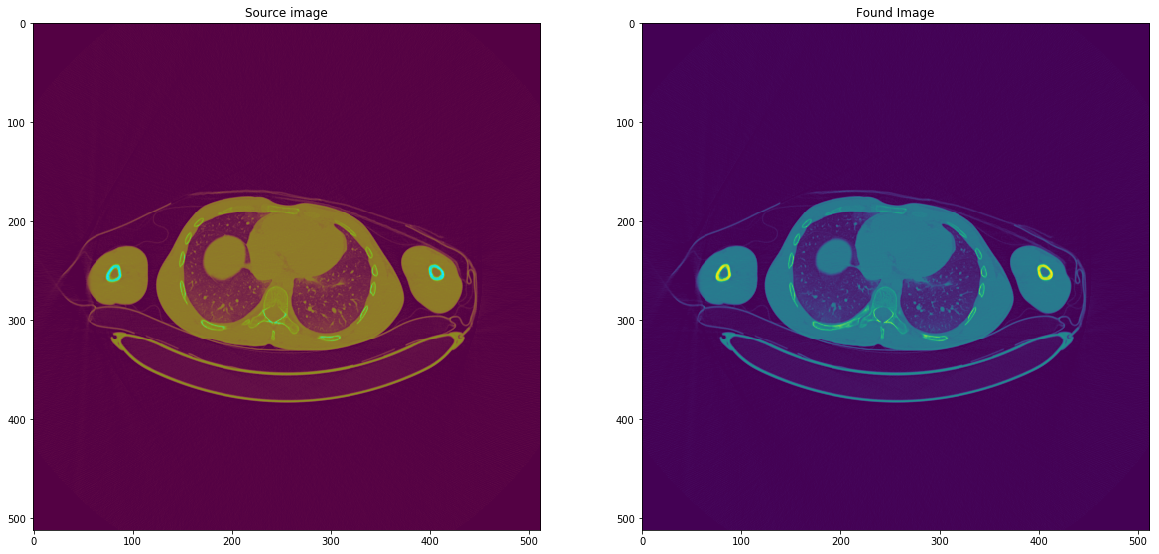

In [0]:
startt = time.time()

testArr = []
i = -50


for filename in sorted(os.listdir(r'/content/drive/My Drive/ThesisData/WorkingDir')):
  if filename.endswith(".jpg") or filename.endswith(".png"):
    testArr.append([cv2.imread(('/content/drive/My Drive/ThesisData/WorkingDir/'+filename)),i])
    i = i+1


indstart = ind-50
indend = ind+50
print(ind)
if(indstart<0):
  indstart = 0
if(indend>dicom_image_file_0.pixel_array.shape[0]):
  indend = dicom_image_file_0.pixel_array.shape[0]



dest = Path('/content/drive/My Drive/ThesisData/WorkingDir')

dest.mkdir(parents=True, exist_ok=True)

import shutil
shutil.rmtree('/content/drive/My Drive/ThesisData/WorkingDir/')

dest = Path('/content/drive/My Drive/ThesisData/WorkingDir')

dest.mkdir(parents=True, exist_ok=True)

for num in range(indstart, indend+1):
  plt.imsave('/content/drive/My Drive/ThesisData/WorkingDir/'+str(num),dicom_image_file_0.pixel_array[num])


import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
image1 = cv2.imread('/content/drive/My Drive/ThesisData/Test.png')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

mlist = []
for image2 in testArr:
  # Create test image by adding Scale Invariance and Rotational Invariance

  test_image = cv2.pyrDown(image2[0])
  test_image = cv2.pyrDown(test_image)
  num_rows, num_cols = test_image.shape[:2]


  test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)


  orb = cv2.ORB_create()

  train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
  test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

  keypoints_without_size = np.copy(training_image)
  keypoints_with_size = np.copy(training_image)

  cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

  cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


  # Create a Brute Force Matcher object.
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

  # Perform the matching between the ORB descriptors of the training image and the test image
  matches = bf.match(train_descriptor, test_descriptor)

  # The matches with shorter distance are the ones we want.
  matches = sorted(matches, key = lambda x : x.distance)
  result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

  mlist.append([image2[0],image2[1],matches] )


numMatch = 100000000
ind2 = -50
ind3 = -50
imm = []

distances = []

for i in mlist:
  sumD = 0
  for i2 in i[2]:
    sumD = sumD + i2.distance
  distances.append(sumD/len(i[2]))

for i in distances:
  if(i < numMatch):
    numMatch = i
    ind3 = ind2
  ind2 = ind2+1



fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Source image")
plots[0].imshow(image1)

plots[1].set_title("Found Image")
plots[1].imshow(dicom_image_file_0.pixel_array[ind+ind3])


endt = time.time()

print(endt-startt)